In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import requests
import scipy.stats as stats
from operator import itemgetter

In [2]:
df_xls = pd.read_excel("nyc_benchmarking_disclosure_data_reported_in_2016.xlsx")

df_xls.to_csv("nyc_benchmarking_disclosure_data_reported_in_2016.csv", encoding='utf-8')
df = pd.read_csv("nyc_benchmarking_disclosure_data_reported_in_2016.csv")
df.head()

,Unnamed: 0,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Property Name,Parent Property Id,Parent Property Name,...,Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft²),Property GFA - Self-reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Release Date,DEP Provided Water Use (kgal),Automatic Water Benchmarking Eligible,Reported Water Method
0,0,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,...,290.2,146.1,98052.0,98000.0,NaN,NaN,2016-04-13 11:08:48,NaN,NaN,NaN
1,1,4630135.0,2,1.010618e+09,NaN,NaN,1026728,(7478) - 432 West 52nd Street Condominium,Not Applicable: Standalone Property,Not Applicable: Standalone Property,...,76.4,125.0,58851.0,57401.0,768.5,13.39,2016-04-26 21:52:05,NaN,Not Eligible,NaN
2,2,4626594.0,3,1.014270e+09,NaN,NaN,1043974,(9250) - 250 East 73rd Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,...,145.5,392.9,166432.0,166433.0,11901.5,71.51,2016-04-26 22:56:36,11897.0,Eligible,Manual
3,3,4626608.0,4,1.015180e+09,NaN,NaN,1048117,(9141) - 141 East 89th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,...,304.6,394.7,114939.0,114939.0,7455.1,64.86,2016-04-26 22:38:03,7455.1,Eligible,ABS
4,4,5048763.0,5,1.003920e+09,NaN,NaN,1079685,605 East 9th ST,Not Applicable: Standalone Property,Not Applicable: Standalone Property,...,0.0,0.0,93420.0,111000.0,NaN,NaN,2016-07-28 17:28:14,NaN,NaN,NaN


In [3]:
del df["Unnamed: 0"]
cols = df.columns.str.replace("\xc2\xb2", "_2")
df.columns = cols

In [4]:
df.columns

Index([u'Record Number', u'Order', u'NYC Borough, Block and Lot (BBL)',
       u'Co-reported BBL Status', u'BBLs Co-reported',
       u'Reported NYC Building Identification Numbers (BINs)',
       u'Property Name', u'Parent Property Id', u'Parent Property Name',
       u'Street Number', u'Street Name', u'Zip Code', u'Borough',
       u'DOF Benchmarking Submission Status',
       u'Primary Property Type - Self Selected',
       u'List of All Property Use Types at Property',
       u'Largest Property Use Type',
       u'Largest Property Use Type - Gross Floor Area (ft_2)',
       u'2nd Largest Property Use Type',
       u'2nd Largest Property Use - Gross Floor Area (ft_2)',
       u'3rd Largest Property Use Type',
       u'3rd Largest Property Use Type - Gross Floor Area (ft_2)',
       u'Year Built', u'Number of Buildings - Self-reported', u'Occupancy',
       u'Metered Areas (Energy)', u'Metered Areas  (Water)',
       u'ENERGY STAR Score', u'Site EUI (kBtu/ft_2)',
       u'Weather Nor

In [5]:
df.head()

,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Property Name,Parent Property Id,Parent Property Name,Street Number,...,Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft_2),Property GFA - Self-reported (ft_2),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Indoor Intensity (gal/ft_2),Release Date,DEP Provided Water Use (kgal),Automatic Water Benchmarking Eligible,Reported Water Method
0,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,290.2,146.1,98052.0,98000.0,NaN,NaN,2016-04-13 11:08:48,NaN,NaN,NaN
1,4630135.0,2,1.010618e+09,NaN,NaN,1026728,(7478) - 432 West 52nd Street Condominium,Not Applicable: Standalone Property,Not Applicable: Standalone Property,432.0,...,76.4,125.0,58851.0,57401.0,768.5,13.39,2016-04-26 21:52:05,NaN,Not Eligible,NaN
2,4626594.0,3,1.014270e+09,NaN,NaN,1043974,(9250) - 250 East 73rd Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1393.0,...,145.5,392.9,166432.0,166433.0,11901.5,71.51,2016-04-26 22:56:36,11897.0,Eligible,Manual
3,4626608.0,4,1.015180e+09,NaN,NaN,1048117,(9141) - 141 East 89th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1341.0,...,304.6,394.7,114939.0,114939.0,7455.1,64.86,2016-04-26 22:38:03,7455.1,Eligible,ABS
4,5048763.0,5,1.003920e+09,NaN,NaN,1079685,605 East 9th ST,Not Applicable: Standalone Property,Not Applicable: Standalone Property,350.0,...,0.0,0.0,93420.0,111000.0,NaN,NaN,2016-07-28 17:28:14,NaN,NaN,NaN


# show the top 5 mostly encountered building typologies

In [7]:
mydict = dict(zip(df.groupby('Primary Property Type - Self Selected')['Order'].count().index, 
                  df.groupby('Primary Property Type - Self Selected')["Order"].count().values))
sorted(mydict.items(), key = operator.itemgetter(1), reverse=True)[:6]

[('Multifamily Housing', 8699),
 ('Office', 1233),
 ('See Primary BBL', 447),
 ('Hotel', 236),
 ('Non-Refrigerated Warehouse', 177),
 ('Other', 129)]

In [8]:
df = df[df['Primary Property Type - Self Selected']== 'Multifamily Housing']
df.head()

,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Property Name,Parent Property Id,Parent Property Name,Street Number,...,Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft_2),Property GFA - Self-reported (ft_2),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Indoor Intensity (gal/ft_2),Release Date,DEP Provided Water Use (kgal),Automatic Water Benchmarking Eligible,Reported Water Method
0,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,...,290.2,146.1,98052.0,98000.0,NaN,NaN,2016-04-13 11:08:48,NaN,NaN,NaN
1,4630135.0,2,1.010618e+09,NaN,NaN,1026728,(7478) - 432 West 52nd Street Condominium,Not Applicable: Standalone Property,Not Applicable: Standalone Property,432.0,...,76.4,125.0,58851.0,57401.0,768.5,13.39,2016-04-26 21:52:05,NaN,Not Eligible,NaN
2,4626594.0,3,1.014270e+09,NaN,NaN,1043974,(9250) - 250 East 73rd Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1393.0,...,145.5,392.9,166432.0,166433.0,11901.5,71.51,2016-04-26 22:56:36,11897.0,Eligible,Manual
3,4626608.0,4,1.015180e+09,NaN,NaN,1048117,(9141) - 141 East 89th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1341.0,...,304.6,394.7,114939.0,114939.0,7455.1,64.86,2016-04-26 22:38:03,7455.1,Eligible,ABS
8,2792771.0,9,1.000088e+09,NaN,NaN,1087700,"Whitehall Properties, LLC",Not Applicable: Standalone Property,Not Applicable: Standalone Property,39.0,...,1116.3,625.9,169061.0,169055.0,NaN,NaN,2016-03-23 12:34:18,NaN,NaN,NaN


In [13]:
# check if there are missing values
print"Are there missing values? -->", df["Site EUI (kBtu/ft_2)"].isnull().values.any()
print "There are %i missing values out of %i properties(%.lf ppercent)" %(df["Site EUI (kBtu/ft_2)"].isnull().sum(),
                                                                          len(df), 
                                                                          df["Site EUI (kBtu/ft_2)"].isnull().sum()/float(len(df))*100)

Are there missing values? --> False
There are 0 missing values out of 8652 properties(0 ppercent)


# Data Cleaning

In [10]:
df = df.dropna(subset=["Site EUI (kBtu/ft_2)"])
print 'Examples after dropping NaNs:', len(df)

Examples after dropping NaNs: 8654


In [11]:
df = df[df['Site EUI (kBtu/ft_2)']>0]
print 'Examples after dropping zeros:', len(df)

Examples after dropping zeros: 8652


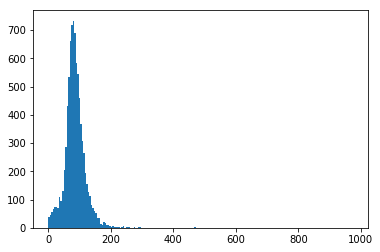

In [12]:
plt.hist(df["Site EUI (kBtu/ft_2)"][df["Site EUI (kBtu/ft_2)"]<1000], bins=200)
plt.show()

In [16]:
def clean(df):
    df = df[(df.log_eui<np.mean(df.log_eui)+1*np.std(df.log_eui))&(df.log_eui>np.mean(df.log_eui)-2*np.std(df.log_eui))]
    return df

df["eui"] = df["Site EUI (kBtu/ft_2)"]
df["log_eui"] = np.log10(df.eui)
df = clean(df)
print "Examples after cleaning EUI:", len(df)

Examples after cleaning EUI: 8172


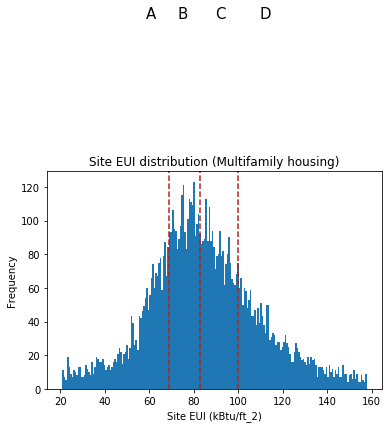

In [21]:
plt.hist(df["Site EUI (kBtu/ft_2)"], bins = 200)

for label, pos in zip(["A", "B", "C"], df["Site EUI (kBtu/ft_2)"].describe()[4:7].values):
    plt.axvline(x=pos, color="firebrick", linestyle="--")
    plt.text(pos-10, 220, label, fontsize=15)

plt.text(pos+10, 220, "D", fontsize=15)

plt.title("Site EUI distribution (Multifamily housing)")
plt.xlabel("Site EUI (kBtu/ft_2)")
plt.ylabel("Frequency")
plt.show()

# Understanding relationships

In [34]:
def makeCorrPlots(x, y):
    tmp = df[[x, y]]
    tmp = tmp.dropna()
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(tmp[x].astype(float), tmp[y])
    
    plt.scatter(tmp[x].astype(float), tmp[y], alpha=0.5)
    plt.plot(tmp[x].astype(float), intercept+slope+tmp[x].astype('float'), color="firebrick")
    plt.title("%s v. %s (corr = %.2f)" %(y, x, np.corrcoef(tmp[x].astype("float"), tmp[y])[0][1]))

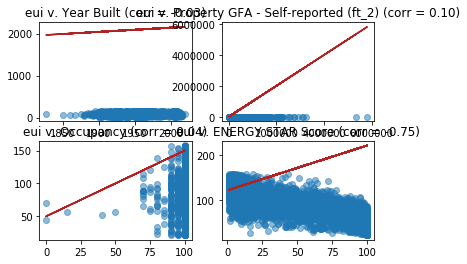

In [37]:
for i, var in enumerate(["Year Built", "Property GFA - Self-reported (ft_2)", "Occupancy", "ENERGY STAR Score"], 1):
    plt.subplot(2,2,i)
    makeCorrPlots(var, "eui")
plt.show()

# Income, asthma, and energy

## Get zipcode level energy efficiency

In [38]:
df =df[df["Zip Code"].notnull()]
df["Zip Code"] = df["Zip Code"].astype(int)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [41]:
zipCode = df.groupby("Zip Code").median()
zipCode.head()

,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Street Number,Largest Property Use Type - Gross Floor Area (ft_2),Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft_2),Weather Normalized Site EUI (kBtu/ft_2),...,Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft_2),Property GFA - Self-reported (ft_2),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Indoor Intensity (gal/ft_2),DEP Provided Water Use (kgal),eui,log_eui
Zip Code,,,,,,,,,,,,,,,,,,,,,
10001,3126782.0,1025.0,1.007790e+09,252.0,114778.0,1.0,100.0,58.0,73.30,72.70,...,579.80,345.00,243.40,115925.0,115925.0,5161.55,39.875,3860.00,73.30,1.865104
10002,2948575.0,352.5,1.003260e+09,201.0,136070.0,1.0,100.0,45.0,90.80,90.50,...,874.00,284.55,540.85,131365.0,136070.0,6012.85,56.055,5129.60,90.80,1.958048
10003,2949182.5,657.5,1.005640e+09,102.0,103868.5,1.0,100.0,46.0,80.95,81.10,...,622.30,325.35,268.85,109575.0,115200.0,4771.30,42.750,4616.20,80.95,1.908193
10004,2960886.5,61.5,1.000249e+09,25.5,180903.0,1.0,100.0,2.0,103.40,102.80,...,1841.25,156.50,704.30,249098.5,233292.0,6226.25,0.320,7035.05,103.40,2.013860
10005,4038796.5,78.5,1.000303e+09,59.5,339926.5,1.0,100.0,30.0,80.75,80.85,...,2072.60,328.00,1122.05,382107.0,341626.5,14706.70,43.640,14706.70,80.75,1.906648


In [42]:
zcEE = zipCode["Total GHG Emissions (Metric Tons CO2e)"]/zipCode["Property GFA - Self-reported (ft_2)"]*1000
zcEE.head()

Zip Code
10001    5.001510
10002    6.423165
10003    5.401910
10004    7.892470
10005    6.066860
dtype: float64

In [43]:
zcEE = zcEE.reset_index()
zcEE["Zip Code"] = zcEE["Zip Code"].astype(str)
zcEE.columns = ["Zip Code", "GHG intensity"]
zcEE.head()

,Zip Code,GHG intensity
0,10001,5.001510
1,10002,6.423165
2,10003,5.401910
3,10004,7.892470
4,10005,6.066860


## Get zip code level asthma hospitalization rates

In [ ]:
html= requests.get("https://www.health.ny.gov/statistics/ny_asthma/hosp/zipcode/"+boro+"_t6.htm").content

In [53]:
html= requests.get?

In [ ]:
html= requests.get

In [2]:
counties = ["new_y", "queen", "kings", "bronx", "richm"]
tmp = []

for boro in counties:
    html= requests.get("https://www.health.ny.gov/statistics/ny_asthma/hosp/zipcode/"+boro+"_t6.htm").content
    foo = pd.read_html(html)[0]
    foo = foo.iloc[2:]
    tmp.append(foo)
    
asthma = pd.concat(tmp, axis=0)
asthma.columns = ["Zip Code", "Discharges 2012-2104", "Discharge Rate"]
asthma.reset_index(inplace=True)
asthma = asthma.drop("index", axis=1)

ImportError: lxml not found, please install it

In [48]:
asthma["Discharges 2012-2014"] = pd.to_numeric(asthma["Discharge 2012-2014"], errors = "coerce")
asthma["Discharge Rate"] = pd.to_numeric(asthma["Discharge Rate"], errors = "coerce")
asthma["Zip Code"] = asthma["Zip Code"].apply(lambda x: str(x[:5]))
asthma = asthma.dropna()
asthma.head()

NameError: name 'asthma' is not defined

## Merge them

In [ ]:
merged = pd.merge(zcEE, asthma, on="Zip Code")
merged.head()

In [ ]:
short = merged[["GHG intensity", "Discharge Rate"]]
short = short.dropna()
feat = short["GHG intensity"]
targ = short["Discharge Rate"]

In [ ]:
plt.scatter(feat, targ)
slope, intercept, r_value, p_value, std_err = stats.linregress(feat, targ)
plt.plot(feat, intercept + slope + feat, color = "firebrick" )
plt.xlabel("GHG intensity (kg/sq.ft.)")
plt.ylabel("Hospital discharge rate (per 10,000 population)")
plt.text(8, 45, "y = %.2f + %.2f*x" %(intercept, slope), fontsize = 14)
plt.title("Asthma v. GHG intensity (corr=%.2f)" %np.corrcoef(feat, targ)[0][1])